In [1]:
#imports the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the datasets 

In [2]:
train_data = pd.read_csv("C:/DSA COURSE/Loan Prediction/train_ctrUa4K.csv")
test_data  = pd.read_csv("C:/DSA COURSE/Loan Prediction/test_lAUu6dG.csv")
submission = pd.read_csv("C:/DSA COURSE/Loan Prediction/sample_submission_49d68Cx.csv")

# Train Dataset

Data analysis 

In [3]:
# datas of train dataset
train_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
# Data of first five 
train_data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# Information of train dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
#Shape of dataset
train_data.shape

(614, 13)

In [7]:
# Column name of train datset
train_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
# datatype of train dataset
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
train_data["Loan_ID"].value_counts()

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64

In [10]:
# check the values of dependents column
train_data["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [11]:
#replacing the value 3+ with 4
train_data = train_data.replace(to_replace = '3+',value =4 )

In [12]:
# again check the values of dependents
train_data["Dependents"].value_counts()

0    345
1    102
2    101
4     51
Name: Dependents, dtype: int64

In [13]:
# Check the datatype of dependent
train_data["Dependents"].dtypes

dtype('O')

In [14]:
# Change the datatype of dependent from object to float
train_data["Dependents"] = train_data["Dependents"].astype(float)

In [15]:
# datatypes of train dataset
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [16]:
# Describe the integer datatype of train datset 
train_data.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,599.000000,614.000000,614.000000,592.000000,600.00000,564.000000
mean,0.848080,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,1.220762,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,2.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,4.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Pre processing & Exploratory Data Analysis 

In [17]:
# Null value
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
# store the null dates to another variable 
null_values =train_data[['Gender', 'Married', 'Dependents','Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History']]
null_values

,Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History
0,Male,No,0.0,No,NaN,360.0,1.0
1,Male,Yes,1.0,No,128.0,360.0,1.0
2,Male,Yes,0.0,Yes,66.0,360.0,1.0
3,Male,Yes,0.0,No,120.0,360.0,1.0
4,Male,No,0.0,No,141.0,360.0,1.0
...,...,...,...,...,...,...,...
609,Female,No,0.0,No,71.0,360.0,1.0
610,Male,Yes,4.0,No,40.0,180.0,1.0
611,Male,Yes,1.0,No,253.0,360.0,1.0
612,Male,Yes,2.0,No,187.0,360.0,1.0


In [19]:
# checking the null values
null_values.isnull().sum()

Gender              13
Married              3
Dependents          15
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
dtype: int64

In [20]:
# Percentage of null values
null_values.isnull().sum()*100/len(train_data)

Gender              2.117264
Married             0.488599
Dependents          2.442997
Self_Employed       5.211726
LoanAmount          3.583062
Loan_Amount_Term    2.280130
Credit_History      8.143322
dtype: float64

 All null values are below 50% So no need to drop

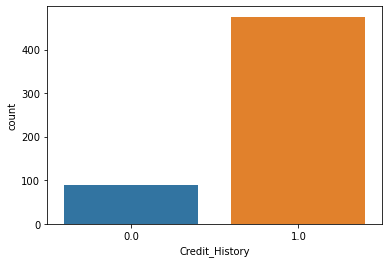

In [21]:
# count plot of Credit_History
sns.countplot(x ='Credit_History',data = train_data)
plt.show()

In [22]:
# frequency graph of integer dataset
freq_graph = train_data.select_dtypes(include="float")
freq_graph

,Dependents,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.0,0.0,NaN,360.0,1.0
1,1.0,1508.0,128.0,360.0,1.0
2,0.0,0.0,66.0,360.0,1.0
3,0.0,2358.0,120.0,360.0,1.0
4,0.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,0.0,0.0,71.0,360.0,1.0
610,4.0,0.0,40.0,180.0,1.0
611,1.0,240.0,253.0,360.0,1.0
612,2.0,0.0,187.0,360.0,1.0


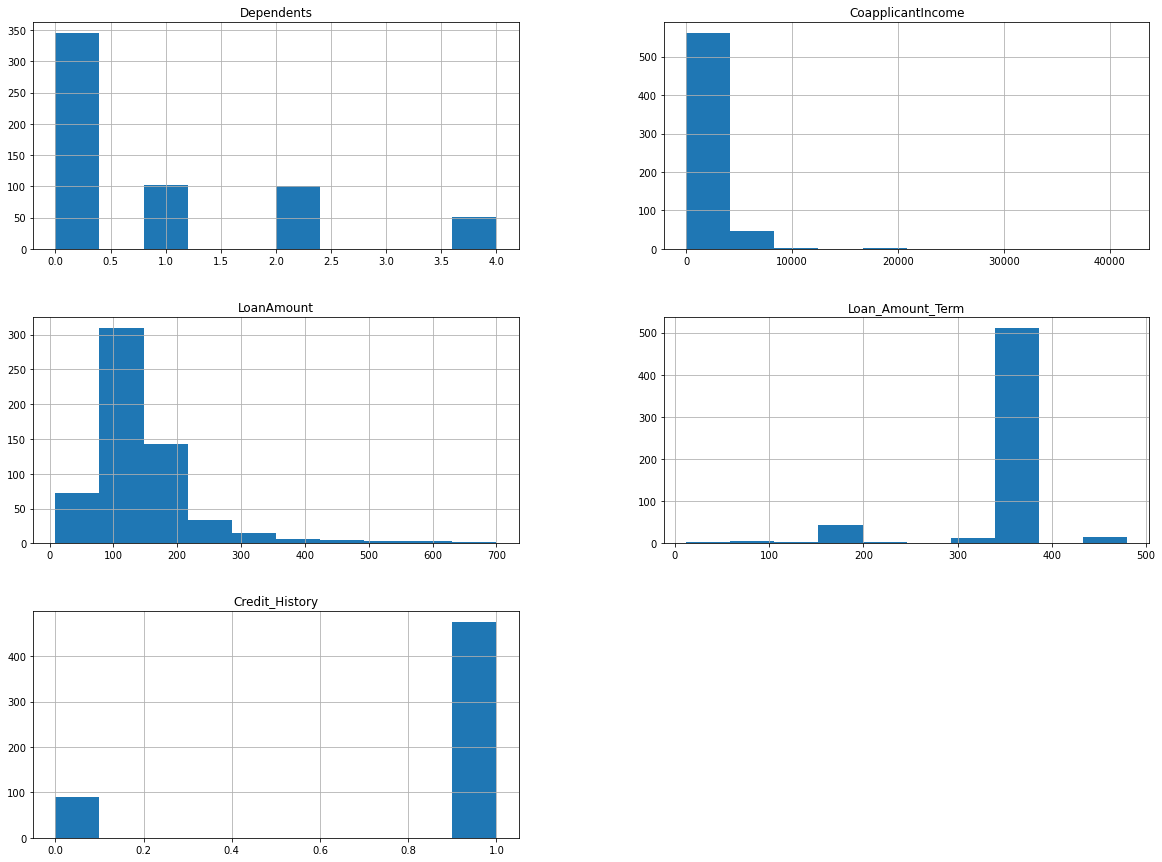

In [23]:
# Plot the frequency graph
freq_graph.hist(figsize=[20,15])
plt.show()

In [24]:
# Here the distribution is skewed ..so numerical datas can be filled with median

In [25]:
# fill the numerical null with median
for i in["Dependents", "LoanAmount",'Loan_Amount_Term','Credit_History']:
    train_data[i]=train_data[i].fillna(train_data[i].median())
# fill the word "missing " in the place of categorical null values
for i in["Gender", "Married",'Self_Employed']:
    train_data[i]=train_data[i].fillna('Missing')

In [26]:
train_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

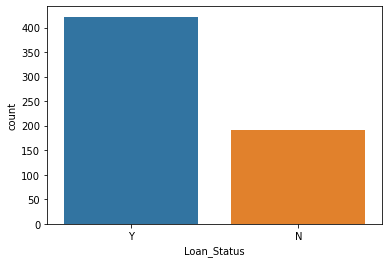

In [27]:
# count plot of Loan_Status
sns.countplot(x ='Loan_Status',data = train_data)
plt.show()

 categorical datas 

In [28]:
cat = train_data.select_dtypes(exclude='number')
cat.columns

Index(['Loan_ID', 'Gender', 'Married', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

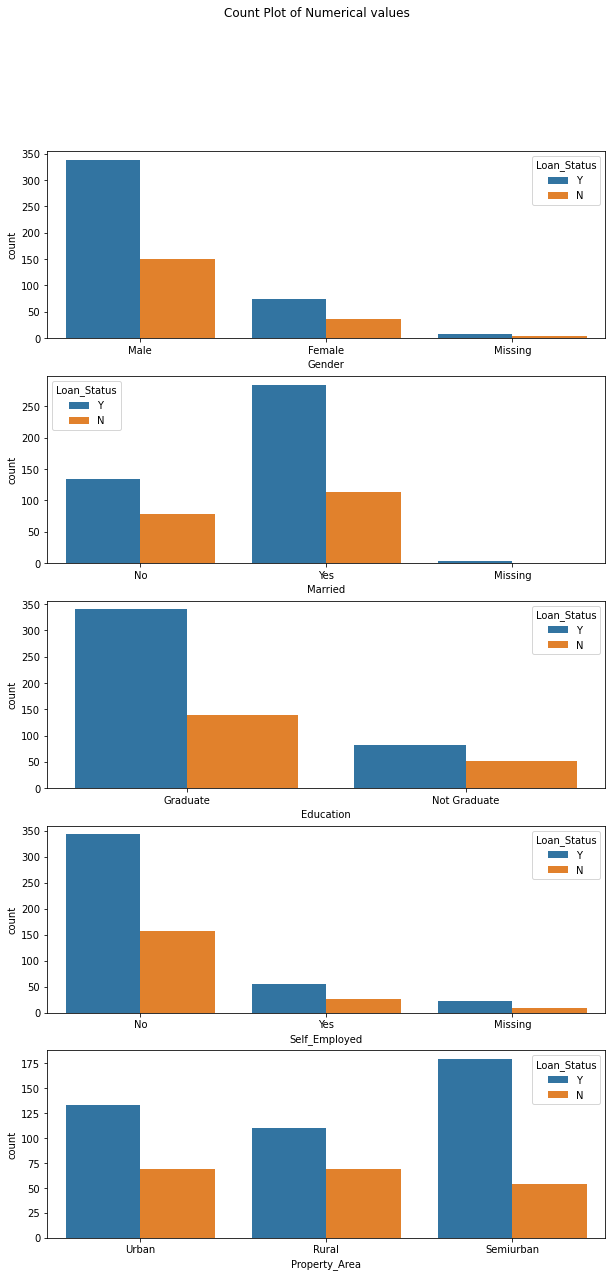

In [29]:
fig, axes = plt.subplots(5, figsize=(10, 20))
fig.suptitle('Count Plot of Numerical values')
sns.countplot(ax=axes[0], data=train_data, x='Gender', hue ="Loan_Status")
sns.countplot( ax=axes[1],data=train_data, x='Married', hue ="Loan_Status")
sns.countplot( ax=axes[2],data=train_data, x='Education', hue ="Loan_Status")
sns.countplot(ax=axes[3], data=train_data, x='Self_Employed', hue ="Loan_Status")
sns.countplot( ax=axes[4],data=train_data, x='Property_Area', hue ="Loan_Status")
plt.show()

1. Loan approved high in male compared to female
2. High loan approved in married
3. More loan approved in Graduate people in case of education
4. Loan approval high in Non-Self Employed 
5. Semi urban property area have high loan approval status compared to Urban and Rural

Numerical Datas

In [30]:
num = train_data.select_dtypes(exclude='object')
num.columns

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

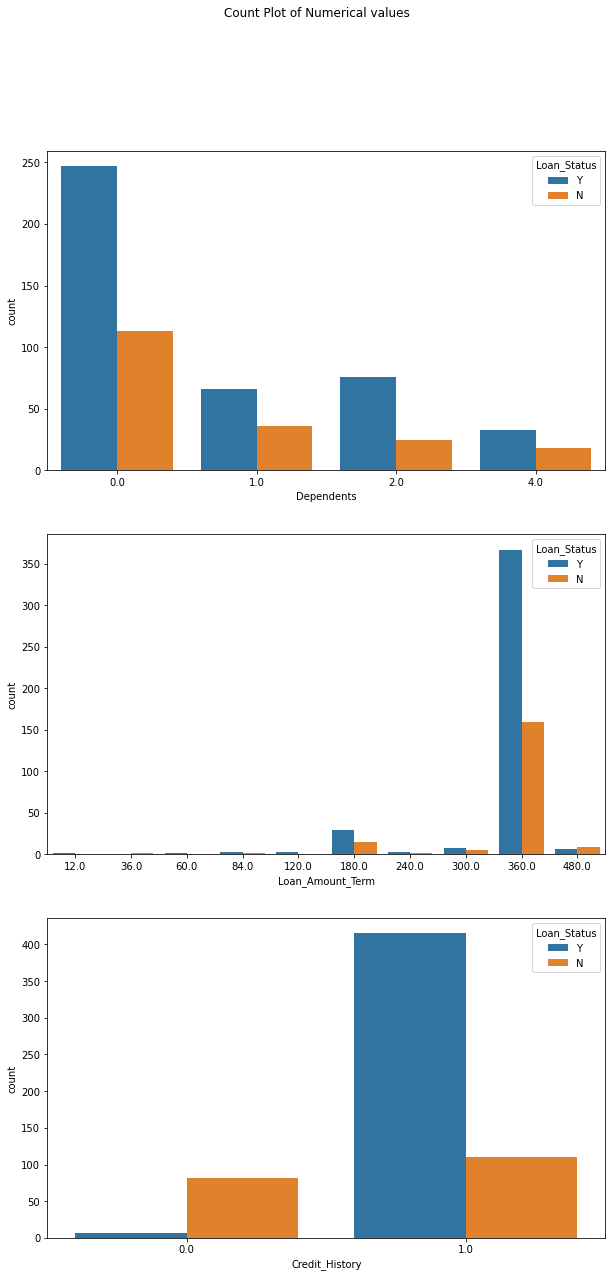

In [31]:
fig, axes = plt.subplots(3 ,figsize=(10, 20))
fig.suptitle('Count Plot of Numerical values')
sns.countplot(ax=axes[0], data=train_data, x='Dependents', hue ="Loan_Status")
sns.countplot(ax=axes[1], data=train_data, x='Loan_Amount_Term', hue ="Loan_Status")
sns.countplot(ax=axes[2], data=train_data, x='Credit_History', hue ="Loan_Status")
plt.show()

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

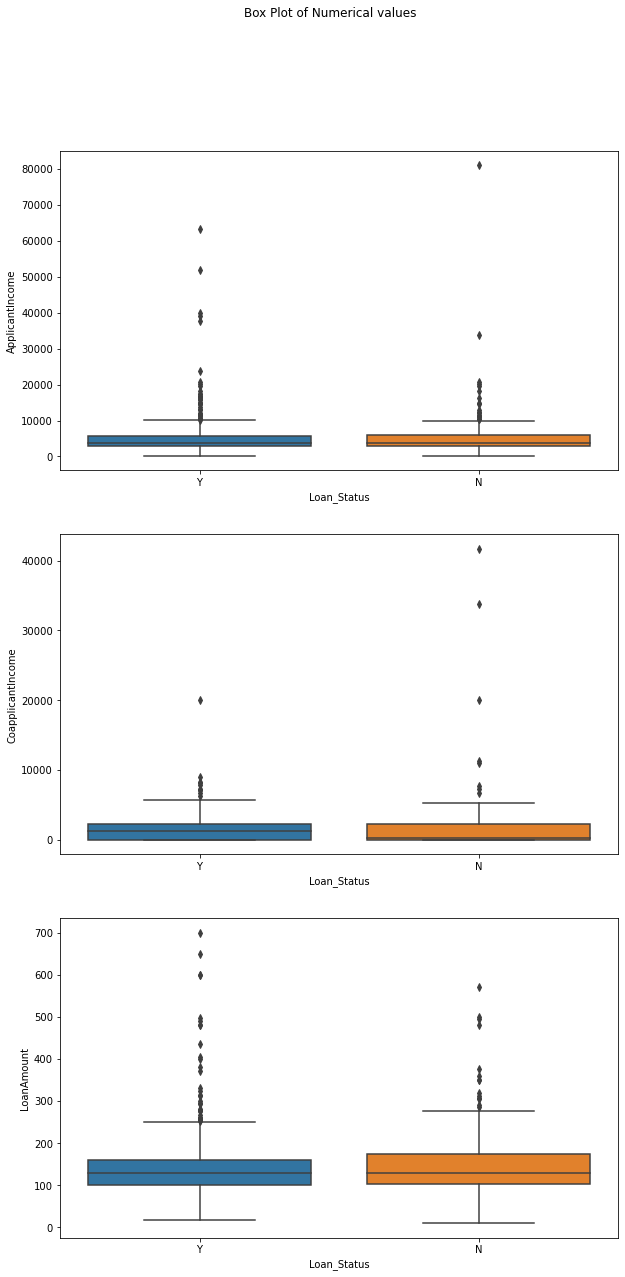

In [32]:
fig, axes = plt.subplots(3 ,figsize=(10, 20))
fig.suptitle('Box Plot of Numerical values')
sns.boxplot(ax=axes[0],data=train_data, y='ApplicantIncome', x="Loan_Status")
sns.boxplot(ax=axes[1],data=train_data, y='CoapplicantIncome', x="Loan_Status")
sns.boxplot(ax=axes[2],data=train_data, y='LoanAmount', x="Loan_Status")

In [33]:
train_data.head(4)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y


In [34]:
train_data["Total_Income"] =train_data["ApplicantIncome"] + train_data["CoapplicantIncome"]
train_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0
610,LP002979,Male,Yes,4.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0


In [35]:
train_data["Credit_History"].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [36]:
train_data = train_data.drop(["Loan_ID","ApplicantIncome","CoapplicantIncome"],axis=1)
train_data

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,No,0.0,Graduate,No,128.0,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1.0,Graduate,No,128.0,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0.0,Graduate,Yes,66.0,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0.0,Not Graduate,No,120.0,360.0,1.0,Urban,Y,4941.0
4,Male,No,0.0,Graduate,No,141.0,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0.0,Graduate,No,71.0,360.0,1.0,Rural,Y,2900.0
610,Male,Yes,4.0,Graduate,No,40.0,180.0,1.0,Rural,Y,4106.0
611,Male,Yes,1.0,Graduate,No,253.0,360.0,1.0,Urban,Y,8312.0
612,Male,Yes,2.0,Graduate,No,187.0,360.0,1.0,Urban,Y,7583.0


In [37]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
train_data["Gender"] = label.fit_transform(train_data["Gender"])
train_data["Married"] = label.fit_transform(train_data["Married"])
train_data["Education"] = label.fit_transform(train_data["Education"])
train_data["Self_Employed"] = label.fit_transform(train_data["Self_Employed"])
train_data["Property_Area"] = label.fit_transform(train_data["Property_Area"])
train_data["Loan_Status"] = label.fit_transform(train_data["Loan_Status"])
train_data

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,1,1,0.0,0,1,128.0,360.0,1.0,2,1,5849.0
1,1,2,1.0,0,1,128.0,360.0,1.0,0,0,6091.0
2,1,2,0.0,0,2,66.0,360.0,1.0,2,1,3000.0
3,1,2,0.0,1,1,120.0,360.0,1.0,2,1,4941.0
4,1,1,0.0,0,1,141.0,360.0,1.0,2,1,6000.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0,1,0.0,0,1,71.0,360.0,1.0,0,1,2900.0
610,1,2,4.0,0,1,40.0,180.0,1.0,0,1,4106.0
611,1,2,1.0,0,1,253.0,360.0,1.0,2,1,8312.0
612,1,2,2.0,0,1,187.0,360.0,1.0,2,1,7583.0


In [38]:
train_data.shape

(614, 11)

In [39]:
#check the correlation
corr_matrix =train_data.corr()
corr_matrix

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
Gender,1.000000,0.345216,0.171926,0.024382,0.046235,0.135505,-0.068522,-0.003844,-0.030903,0.008690,0.122572
Married,0.345216,1.000000,0.313771,0.022530,0.030171,0.141920,-0.103662,0.002419,-0.003370,0.075547,0.082836
Dependents,0.171926,0.313771,1.000000,0.059001,0.046475,0.170584,-0.104059,-0.047203,-0.012006,0.002474,0.142580
Education,0.024382,0.022530,0.059001,1.000000,0.000820,-0.168759,-0.073928,-0.073658,-0.065243,-0.085884,-0.161362
Self_Employed,0.046235,0.030171,0.046475,0.000820,1.000000,0.082048,-0.017729,-0.041027,-0.028730,-0.011332,0.064201
LoanAmount,0.135505,0.141920,0.170584,-0.168759,0.082048,1.000000,0.036960,-0.000607,-0.046632,-0.033214,0.620316
Loan_Amount_Term,-0.068522,-0.103662,-0.104059,-0.073928,-0.017729,0.036960,1.000000,-0.004705,-0.076120,-0.022549,-0.070917
Credit_History,-0.003844,0.002419,-0.047203,-0.073658,-0.041027,-0.000607,-0.004705,1.000000,0.001963,0.540556,-0.012563
Property_Area,-0.030903,-0.003370,-0.012006,-0.065243,-0.028730,-0.046632,-0.076120,0.001963,1.000000,0.032112,-0.004218
Loan_Status,0.008690,0.075547,0.002474,-0.085884,-0.011332,-0.033214,-0.022549,0.540556,0.032112,1.000000,-0.031271


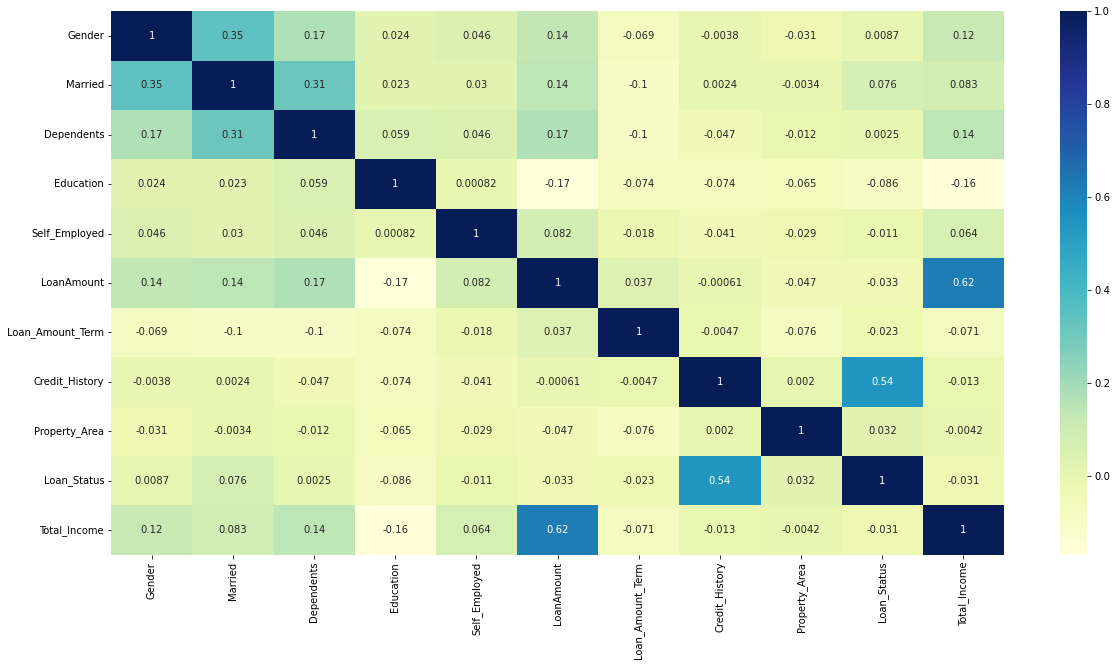

In [40]:
#Heatmap
plt.subplots(figsize=(20,10))
sns.heatmap(corr_matrix,annot = True,cmap="YlGnBu")
plt.show()

# Test Dataset

Data analysis 

In [41]:
# datas of test dataset
test_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [42]:
# Data of first five 
test_data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [43]:
#Shape of dataset
test_data.shape

(367, 12)

In [44]:
# Column name of test datset
test_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [45]:
# datatype of test dataset
test_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [46]:
# check the values of dependents column
test_data["Dependents"].value_counts()

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [47]:
#replacing the value 3+ with 4
test_data = test_data.replace(to_replace = '3+',value =4 )

In [48]:
# check the values of dependents column
test_data["Dependents"].value_counts()

0    200
2     59
1     58
4     40
Name: Dependents, dtype: int64

In [49]:
# Change the datatype of dependent from object to float
test_data["Dependents"] = test_data["Dependents"].astype(float)

In [50]:
# datatypes of test dataset
test_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

# Pre processing & Exploratory Data Analysis 

In [51]:
test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [52]:
# fill the numerical null with median
for i in["Dependents", "LoanAmount",'Loan_Amount_Term','Credit_History']:
    test_data[i]=test_data[i].fillna(test_data[i].median())
# fill the word "missing " in the place of categorical null values
for i in["Gender",'Self_Employed']:
    test_data[i]=test_data[i].fillna('Missing')

In [53]:
test_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [54]:
test_data["Total_Income"] =test_data["ApplicantIncome"] + test_data["CoapplicantIncome"]
test_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,LP001015,Male,Yes,0.0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,5720
1,LP001022,Male,Yes,1.0,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4576
2,LP001031,Male,Yes,2.0,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,6800
3,LP001035,Male,Yes,2.0,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4886
4,LP001051,Male,No,0.0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,3276
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,4.0,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,5786
363,LP002975,Male,Yes,0.0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,4867
364,LP002980,Male,No,0.0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban,5243
365,LP002986,Male,Yes,0.0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,7393


In [55]:
test_data = test_data.drop(["Loan_ID","ApplicantIncome","CoapplicantIncome"],axis=1)
test_data

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,Male,Yes,0.0,Graduate,No,110.0,360.0,1.0,Urban,5720
1,Male,Yes,1.0,Graduate,No,126.0,360.0,1.0,Urban,4576
2,Male,Yes,2.0,Graduate,No,208.0,360.0,1.0,Urban,6800
3,Male,Yes,2.0,Graduate,No,100.0,360.0,1.0,Urban,4886
4,Male,No,0.0,Not Graduate,No,78.0,360.0,1.0,Urban,3276
...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,4.0,Not Graduate,Yes,113.0,360.0,1.0,Urban,5786
363,Male,Yes,0.0,Graduate,No,115.0,360.0,1.0,Urban,4867
364,Male,No,0.0,Graduate,No,126.0,360.0,1.0,Semiurban,5243
365,Male,Yes,0.0,Graduate,No,158.0,360.0,1.0,Rural,7393


In [56]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
test_data["Gender"] = label.fit_transform(test_data["Gender"])
test_data["Married"] = label.fit_transform(test_data["Married"])
test_data["Education"] = label.fit_transform(test_data["Education"])
test_data["Self_Employed"] = label.fit_transform(test_data["Self_Employed"])
test_data["Property_Area"] = label.fit_transform(test_data["Property_Area"])
test_data

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,1,1,0.0,0,1,110.0,360.0,1.0,2,5720
1,1,1,1.0,0,1,126.0,360.0,1.0,2,4576
2,1,1,2.0,0,1,208.0,360.0,1.0,2,6800
3,1,1,2.0,0,1,100.0,360.0,1.0,2,4886
4,1,0,0.0,1,1,78.0,360.0,1.0,2,3276
...,...,...,...,...,...,...,...,...,...,...
362,1,1,4.0,1,2,113.0,360.0,1.0,2,5786
363,1,1,0.0,0,1,115.0,360.0,1.0,2,4867
364,1,0,0.0,0,1,126.0,360.0,1.0,1,5243
365,1,1,0.0,0,1,158.0,360.0,1.0,0,7393


In [57]:
test_data.shape

(367, 10)

# Model Building

#Target varibale-------->Loan Status

In [58]:
# Independent variables
x = train_data.drop(["Loan_Status"],axis = 1)
x

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,1,1,0.0,0,1,128.0,360.0,1.0,2,5849.0
1,1,2,1.0,0,1,128.0,360.0,1.0,0,6091.0
2,1,2,0.0,0,2,66.0,360.0,1.0,2,3000.0
3,1,2,0.0,1,1,120.0,360.0,1.0,2,4941.0
4,1,1,0.0,0,1,141.0,360.0,1.0,2,6000.0
...,...,...,...,...,...,...,...,...,...,...
609,0,1,0.0,0,1,71.0,360.0,1.0,0,2900.0
610,1,2,4.0,0,1,40.0,180.0,1.0,0,4106.0
611,1,2,1.0,0,1,253.0,360.0,1.0,2,8312.0
612,1,2,2.0,0,1,187.0,360.0,1.0,2,7583.0


In [59]:
#Dependent / Target variable
y = train_data["Loan_Status"]
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [60]:
#Scaling
from sklearn.preprocessing import StandardScaler
Std_Scaler = StandardScaler()
x = Std_Scaler.fit_transform(x)

In [61]:
type(x)

numpy.ndarray

In [62]:
#convert array to dataframe
x = pd.DataFrame(x)

In [63]:
#column name
x.columns = ["Gender",'Married', 'Dependents', 'Education',"Self_Employed","LoanAmount","Loan_Amount_Term","Credit_History","Property_Area","Total_Income"]

In [64]:
# split the datas
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42, test_size = 0.2)

# Logistic Regression

In [65]:
#import Logistic Regression 
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
# Train the model using trainnig sets
log_model = log_model.fit(x_train,y_train)
y_pred = log_model.predict(x_test)


In [66]:
# Import confusion_matrix,accuracy_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
#predic metric to get performance
print("Accuracy is " ,accuracy_score(y_test,y_pred)*100 ,"%")

Accuracy is  78.04878048780488 %


In [67]:
print("--------------Classification Report---------\n" ,classification_report(y_test,y_pred))

--------------Classification Report---------
               precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123



In [68]:
#confusion matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix  \n",confusion_matrix)

Confusion Matrix  
 [[18 25]
 [ 2 78]]


In [69]:
#Prediction using test_data
pred_test_data = log_model.predict(test_data)

In [70]:
pred_test_data

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [71]:
pred_test_data .shape

(367,)

In [72]:
submission

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N
...,...,...
362,LP002971,N
363,LP002975,N
364,LP002980,N
365,LP002986,N


In [73]:
submission.shape

(367, 2)

In [74]:
#Replace the ‘Loan_Status’ column with the prediction values
submission['Loan_Status']=pred_test_data
submission

,Loan_ID,Loan_Status
0,LP001015,0
1,LP001022,0
2,LP001031,0
3,LP001035,0
4,LP001051,0
...,...,...
362,LP002971,0
363,LP002975,0
364,LP002980,0
365,LP002986,0


In [75]:
submission.Loan_Status.replace(1, 'Y', inplace=True)
submission.Loan_Status.replace(0, 'N', inplace=True)

In [76]:
submission

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N
...,...,...
362,LP002971,N
363,LP002975,N
364,LP002980,N
365,LP002986,N


In [77]:
submission.dtypes

Loan_ID        object
Loan_Status    object
dtype: object

In [78]:
submission.shape

(367, 2)

In [79]:
submission.to_csv("C:/DSA COURSE/Loan Prediction/Logistic_Model.csv",index=None)

In [80]:
submission.shape

(367, 2)

In [81]:
submission.head(4)

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N


# K Nearest Neighbour

In [82]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

In [83]:
# assigning empty list
metric_k =[]
# kepping some values to neighbours 
neighbors = np.arange(3,15)
neighbors

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [84]:
# create a classifier using euclidean
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k,metric ="euclidean")
    classifier.fit(x_train,y_train)
    y_prediction = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_prediction)
    metric_k.append(acc)

In [85]:
metric_k

[0.7235772357723578,
 0.6829268292682927,
 0.7317073170731707,
 0.7317073170731707,
 0.7560975609756098,
 0.7642276422764228,
 0.7723577235772358,
 0.7723577235772358,
 0.7804878048780488,
 0.7804878048780488,
 0.7886178861788617,
 0.7804878048780488]

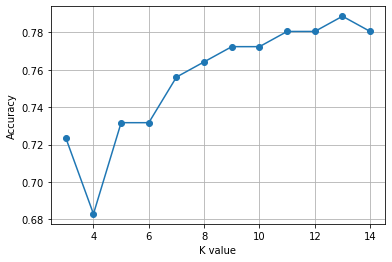

In [86]:
# plot the k value
plt.plot(neighbors,metric_k,'o-')
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.grid()

In [87]:
#K = 13 has the maximum value
#put k = 13 in n_neighbors
classifier = KNeighborsClassifier(n_neighbors =13,metric ="euclidean")
classifier.fit(x_train,y_train)
y_prediction = classifier.predict(x_test)

In [88]:
#Accuracy
print("Accuracy is " ,accuracy_score(y_test,y_prediction)*100 ,"%")

Accuracy is  78.86178861788618 %


In [89]:
print("--------------Classification Report---------\n" ,classification_report(y_test,y_prediction))

--------------Classification Report---------
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [90]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix_knn = confusion_matrix(y_test,y_prediction)
print("Confusion Matrix  \n",confusion_matrix_knn)

Confusion Matrix  
 [[18 25]
 [ 1 79]]


In [91]:
#Prediction using test_data
pred_KNN_test_data = classifier.predict(test_data)

In [92]:
pred_KNN_test_data

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,

In [93]:
#Replace the ‘Loan_Status’ column with the prediction values
submission['Loan_Status']=pred_KNN_test_data
submission

,Loan_ID,Loan_Status
0,LP001015,0
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
...,...,...
362,LP002971,0
363,LP002975,1
364,LP002980,1
365,LP002986,0


In [94]:
#Converting 1 to Y and O to N 
submission.Loan_Status.replace(1, 'Y', inplace=True)
submission.Loan_Status.replace(0, 'N', inplace=True)

In [95]:
# Save datset into csv
submission.to_csv("C:/DSA COURSE/Loan Prediction/KNN_Model.csv",index=None)

In [96]:
submission.head(4)

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y


# SVM

In [97]:
#import 
from sklearn.svm import SVC

In [98]:
# svm using linear kernel
svm_cls = SVC(kernel = "linear")
svm_cls = svm_cls.fit(x_train,y_train)
y_pred_svm = svm_cls.predict(x_test)

In [99]:
#Accuracy
print("Accuracy is " ,accuracy_score(y_test,y_pred_svm)*100 ,"%")

Accuracy is  78.86178861788618 %


In [100]:
print("--------------Classification Report---------\n" ,classification_report(y_test,y_pred_svm))

--------------Classification Report---------
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [101]:
# Confusion matrix
confusion_matrix_svm = confusion_matrix(y_test,y_pred_svm)
print("Confusion Matrix = \n",confusion_matrix_svm)

Confusion Matrix = 
 [[18 25]
 [ 1 79]]


In [102]:
#Prediction using test_data
pred_SVM_test_data = svm_cls.predict(test_data)

In [103]:
pred_SVM_test_data

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [104]:
#Replace the ‘Loan_Status’ column with the prediction values
submission['Loan_Status']=pred_SVM_test_data
submission

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,1


In [105]:
#Converting 1 to Y and O to N 
submission.Loan_Status.replace(1, 'Y', inplace=True)
submission.Loan_Status.replace(0, 'N', inplace=True)

In [106]:
# Save datset into csv
submission.to_csv("C:/DSA COURSE/Loan Prediction/SVM_Model.csv",index=None)

In [107]:
submission.head(4)

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y


# Decision Tree

In [108]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt_cls = DecisionTreeClassifier()
dt_cls = dt_cls.fit(x_train,y_train)
y_pred_dt = dt_cls.predict(x_test)

In [109]:
#Accuracy
print("Accuracy is " ,accuracy_score(y_test,y_pred_dt)*100 ,"%")

Accuracy is  65.85365853658537 %


In [110]:
print("--------------Classification Report---------\n" ,classification_report(y_test,y_pred_dt))

--------------Classification Report---------
               precision    recall  f1-score   support

           0       0.51      0.51      0.51        43
           1       0.74      0.74      0.74        80

    accuracy                           0.66       123
   macro avg       0.62      0.62      0.62       123
weighted avg       0.66      0.66      0.66       123



In [111]:
#confusion matrix
confusion_df = confusion_matrix(y_test,y_pred_dt)
print("Confusion Matrix = \n",confusion_df)

Confusion Matrix = 
 [[22 21]
 [21 59]]


In [112]:
#Prediction using test_data
pred_DT_test_data = dt_cls.predict(test_data)

In [113]:
#Replace the ‘Loan_Status’ column with the prediction values
submission['Loan_Status'] = pred_DT_test_data
submission

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,1


In [114]:
#Converting 1 to Y and O to N 
submission.Loan_Status.replace(1, 'Y', inplace=True)
submission.Loan_Status.replace(0, 'N', inplace=True)

In [115]:
# Save datset into csv
submission.to_csv("C:/DSA COURSE/Loan Prediction/DT_Model.csv",index=None)

# Random Forest

In [116]:
# import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_cls = RandomForestClassifier()
rf_cls = rf_cls.fit(x_train,y_train)
y_pred_rf = rf_cls.predict(x_test)

In [117]:
#Accuracy
print("Accuracy is " ,accuracy_score(y_test,y_pred_rf)*100 ,"%")

Accuracy is  77.23577235772358 %


In [118]:
print("--------------Classification Report---------\n" ,classification_report(y_test,y_pred_rf))

--------------Classification Report---------
               precision    recall  f1-score   support

           0       0.86      0.42      0.56        43
           1       0.75      0.96      0.85        80

    accuracy                           0.77       123
   macro avg       0.81      0.69      0.70       123
weighted avg       0.79      0.77      0.75       123



In [119]:
#Confusion Matrix
confusion_rf = confusion_matrix(y_test,y_pred_rf)
print("Confusion Matrix = \n",confusion_rf)

Confusion Matrix = 
 [[18 25]
 [ 3 77]]


In [120]:
#Prediction using test_data
pred_RF_test_data = rf_cls.predict(test_data)

In [121]:
#Replace the ‘Loan_Status’ column with the prediction values
submission['Loan_Status'] = pred_RF_test_data
submission

,Loan_ID,Loan_Status
0,LP001015,0
1,LP001022,0
2,LP001031,0
3,LP001035,0
4,LP001051,0
...,...,...
362,LP002971,0
363,LP002975,0
364,LP002980,0
365,LP002986,0


In [122]:
#Converting 1 to Y and O to N 
submission.Loan_Status.replace(1, 'Y', inplace=True)
submission.Loan_Status.replace(0, 'N', inplace=True)

In [123]:
# Save datset into csv
submission.to_csv("C:/DSA COURSE/Loan Prediction/RF_Model.csv",index=None)